## Fashion MNIST Classification

#### Import Required Libraries

In [34]:
!pip install tensorflow -q


In [35]:
!pip install keras -q

In [36]:
# Import libraries
import keras
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

from sklearn.preprocessing import LabelBinarizer

from tensorflow.keras import layers, models
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

#### Load the dataset

In [37]:
# Load Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

# Normalize pixel values to range [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape data to add channel dimension (28x28x1)
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

# Class names for reference
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#### Building the CNN

In [38]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

#### Training the Model

In [39]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 21ms/step - accuracy: 0.7380 - loss: 0.7103 - val_accuracy: 0.8703 - val_loss: 0.3565
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.8783 - loss: 0.3348 - val_accuracy: 0.8898 - val_loss: 0.3081
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.8961 - loss: 0.2841 - val_accuracy: 0.8974 - val_loss: 0.2882
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.9099 - loss: 0.2461 - val_accuracy: 0.9028 - val_loss: 0.2732
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.9166 - loss: 0.2235 - val_accuracy: 0.9007 - val_loss: 0.2805
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.9263 - loss: 0.2003 - val_accuracy: 0.9049 - val_loss: 0.2786
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.9315 - loss: 0.1848 - val_accuracy: 0.9076 - val_loss: 0.2705
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.9386 -

#### Making Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


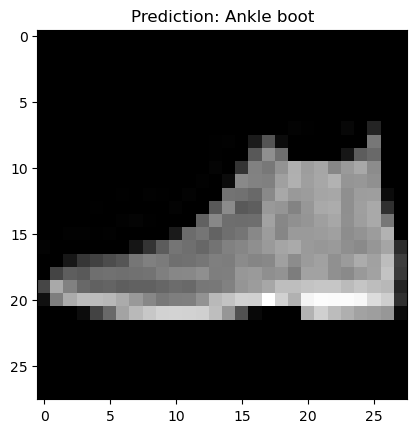

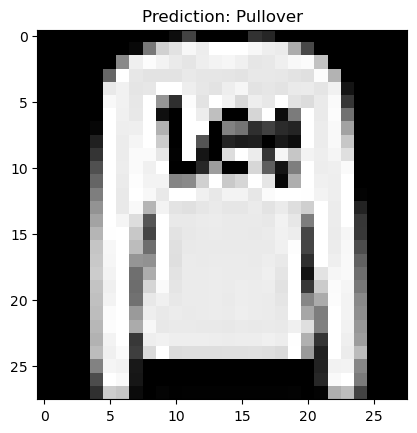

In [40]:
# Predict two test images
sample_images = test_images[:2]
predictions = model.predict(sample_images)

for i, pred in enumerate(predictions):
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Prediction: {class_names[np.argmax(pred)]}")
    plt.show()


#### Saving and Documentation

In [42]:
# Save model and create a README
model.save('fashion_mnist_cnn.keras')

# Create README.md file
with open('README.md', 'w') as f:
    f.write("# Fashion MNIST Classification\n")
    f.write("### Instructions\n")
    f.write("1. Load the model using TensorFlow: `tf.keras.models.load_model('fashion_mnist_cnn.keras')`.\n")
    f.write("2. Follow the code to make predictions for new images.\n")
